"PREDICTION AND ANALYSIS OF NATIONAL PARK TRAILS"



In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [133]:
x=['length','num_reviews','difficulty_rating','elevation_gain','difficulty_rating_squared', 'elevation_gain_squared', 'length_squared']

target = data['popularity']
features = data[x]

The actual train_test_split line is below

In [135]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=22,test_size=0.2)


In [155]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2, include_bias=False) 
poly_train=poly.fit_transform(X_train) #fitting my training model after poly
poly_test= poly.transform(X_test) # applying my model to test set after poly
poly_cols=poly.get_feature_names(X_train.columns) # making a list of my features
poly_cols=[col.replace(' ','X') for col in poly_cols] # renaming my columns
X_train_poly=pd.DataFrame(data=poly_train,columns=poly_cols) #train dataframe with poly feat.
X_test_poly=pd.DataFrame(data=poly_test,columns=poly_cols) #test dataframe wit poly feat.

In [156]:
X_train_poly=pd.DataFrame(data=poly_train,columns=poly_cols)
X_train_poly

,length,num_reviews,difficulty_rating,elevation_gain,difficulty_rating_squared,elevation_gain_squared,length_squared,length^2,lengthXnum_reviews,lengthXdifficulty_rating,lengthXelevation_gain,lengthXdifficulty_rating_squared,lengthXelevation_gain_squared,lengthXlength_squared,num_reviews^2,num_reviewsXdifficulty_rating,num_reviewsXelevation_gain,num_reviewsXdifficulty_rating_squared,num_reviewsXelevation_gain_squared,num_reviewsXlength_squared,difficulty_rating^2,difficulty_ratingXelevation_gain,difficulty_ratingXdifficulty_rating_squared,difficulty_ratingXelevation_gain_squared,difficulty_ratingXlength_squared,elevation_gain^2,elevation_gainXdifficulty_rating_squared,elevation_gainXelevation_gain_squared,elevation_gainXlength_squared,difficulty_rating_squared^2,difficulty_rating_squaredXelevation_gain_squared,difficulty_rating_squaredXlength_squared,elevation_gain_squared^2,elevation_gain_squaredXlength_squared,length_squared^2
0,9173.238,28.0,3.0,406.9080,9.0,1.655741e+05,8.414830e+07,8.414830e+07,256850.664,27519.714,3.732664e+06,82559.142,1.518851e+09,7.719123e+11,784.0,84.0,11393.4240,252.0,4.636075e+06,2.356152e+09,9.0,1220.7240,27.0,4.967224e+05,2.524449e+08,1.655741e+05,3662.1720,6.737343e+07,3.424061e+10,81.0,1.490167e+06,7.573347e+08,2.741479e+10,1.393278e+13,7.080936e+15
1,9012.304,19.0,1.0,105.7656,1.0,1.118636e+04,8.122162e+07,8.122162e+07,171233.776,9012.304,9.531917e+05,9012.304,1.008149e+08,7.319940e+11,361.0,19.0,2009.5464,19.0,2.125409e+05,1.543211e+09,1.0,105.7656,1.0,1.118636e+04,8.122162e+07,1.118636e+04,105.7656,1.183132e+06,8.590454e+09,1.0,1.118636e+04,8.122162e+07,1.251347e+08,9.085745e+11,6.596952e+15
2,5954.558,263.0,1.0,79.8576,1.0,6.377236e+03,3.545676e+07,3.545676e+07,1566048.754,5954.558,4.755167e+05,5954.558,3.797362e+07,2.111293e+11,69169.0,263.0,21002.5488,263.0,1.677213e+06,9.325128e+09,1.0,79.8576,1.0,6.377236e+03,3.545676e+07,6.377236e+03,79.8576,5.092708e+05,2.831492e+09,1.0,6.377236e+03,3.545676e+07,4.066914e+07,2.261161e+11,1.257182e+15
3,965.604,126.0,1.0,7.9248,1.0,6.280246e+01,9.323911e+05,9.323911e+05,121666.104,965.604,7.652219e+03,965.604,6.064230e+04,9.003206e+08,15876.0,126.0,998.5248,126.0,7.913109e+03,1.174813e+08,1.0,7.9248,1.0,6.280246e+01,9.323911e+05,6.280246e+01,7.9248,4.976969e+02,7.389013e+06,1.0,6.280246e+01,9.323911e+05,3.944148e+03,5.855645e+07,8.693531e+11
4,9816.974,0.0,1.0,75.8952,1.0,5.760081e+03,9.637298e+07,9.637298e+07,0.000,9816.974,7.450612e+05,9816.974,5.654657e+07,9.460910e+11,0.0,0.0,0.0000,0.0,0.000000e+00,0.000000e+00,1.0,75.8952,1.0,5.760081e+03,9.637298e+07,5.760081e+03,75.8952,4.371625e+05,7.314246e+09,1.0,5.760081e+03,9.637298e+07,3.317854e+07,5.551162e+11,9.287751e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2645,18024.608,35.0,5.0,1053.9984,25.0,1.110913e+06,3.248865e+08,3.248865e+08,630861.280,90123.040,1.899791e+07,450615.200,2.002376e+10,5.855952e+12,1225.0,175.0,36889.9440,875.0,3.888194e+07,1.137103e+10,25.0,5269.9920,125.0,5.554563e+06,1.624432e+09,1.110913e+06,26349.9600,1.170900e+09,3.424298e+11,625.0,2.777282e+07,8.122162e+09,1.234127e+12,3.609205e+14,1.055512e+17
2646,1931.208,110.0,1.0,60.9600,1.0,3.716122e+03,3.729564e+06,3.729564e+06,212432.880,1931.208,1.177264e+05,1931.208,7.176604e+06,7.202564e+09,12100.0,110.0,6705.6000,110.0,4.087734e+05,4.102521e+08,1.0,60.9600,1.0,3.716122e+03,3.729564e+06,3.716122e+03,60.9600,2.265348e+05,2.273542e+08,1.0,3.716122e+03,3.729564e+06,1.380956e+07,1.385951e+10,1.390965e+13
2647,8207.634,1.0,1.0,194.7672,1.0,3.793426e+04,6.736526e+07,6.736526e+07,8207.634,8207.634,1.598578e+06,8207.634,3.113505e+08,5.529094e+11,1.0,1.0,194.7672,1.0,3.793426e+04,6.736526e+07,1.0,194.7672,1.0,3.793426e+04,6.736526e+07,3.793426e+04,194.7672,7.388350e+06,1.312054e+10,1.0,3.793426e+04,6.736526e+07,1.439008e+09,2.555451e+12,4.538078e+15
2648,18668.344,193.0,3.0,589.7880,9.0,3.478499e+05,3.485071e+08,3.485071e+08,3602990.

In [157]:
X_test_poly=pd.DataFrame(data=poly_test,columns=poly_cols)

In [158]:
#used lasso to narrow down my features
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train_poly,y_train)

y_train_pred = lasso.predict(X_train_poly)
y_pred = lasso.predict(X_test_poly)





/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12466.701747128518, tolerance: 17.8814655987059
  positive)


Setting up a visual printout of our training and testing data

In [160]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (2650, 7) Target:  (2650,)
Test set - Features:  (663, 7) Target:  (663,)


In [161]:
# fit a model
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train_poly, y_train)


In [162]:
print ("R^2 Score:", lm.score(X_train_poly, y_train))

R^2 Score: 0.5714462002416809


In [163]:
y_train_pred = lm.predict(X_train_poly)

In [164]:
y_test_pred=lm.predict(X_test_poly)

Above is our code for running our training data through our model. And below is a visual printout of some metrics such as MAE, MSE, and RMSE to evaluate how well our model performed with the training data.



In [165]:
# Our evaluation metrics consisting of MAE, MSE, RMSE printed out for our training set
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)
print('Mean Absolute Error in Z-Score:', train_mae/price_std )


Mean Absolute Error: 3.7127627007132062
Mean Squared Error: 28.91762274555879
Root Mean Squared Error: 5.37751083174723
Mean Absolute Error in Z-Score: 0.4562073684484345


In [166]:
print ("Score:", lm.score(X_test_poly, y_test))

Score: -7.3458497898667865


In [167]:
# Our evaluation metrics consisting of MAE, MSE, RMSE printed out for our testing set
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_test_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))
print('Mean Absolute Error  Z:', test_mae/price_std )


Mean Absolute Error:4.778971989908312
Mean Squared Error:509.260219643665
Root Mean Squared Error:22.566794624927685
Mean Absolute Error  Z: 0.5872183091545392


FINAL MODEL EXPLANATION:

My final model contained five features, an R^2 value of .76, and a RAE, MSE and RMSE of 2.98, 21.06, and 4.59 respectively. There was one outlier where my prediction was off by a large margin which explains why my RMSE is higher then my RAE. The RMSE between the training and testing data shows that I overfitted meaning perhaps that my model is too complex, but the outlier may be the reason why there is overfit in my model. The overfitting maybe reduced by using less features.

I will now make 4 visualizations to accompany my model to be used in the presentation.



Text(0, 0.5, 'Predictions')

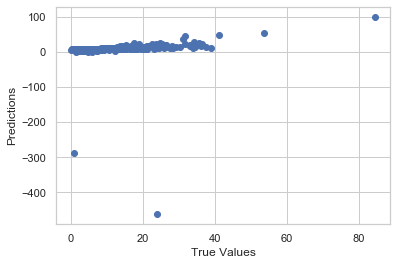

In [169]:
#scatterplot of my predicted vs actual values of my poly model w/ lasso.
plt.scatter(y_test, y_test_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")